# **Placement Visualization Notebook**

This notebook visualizes insights derived from SQL-based exploratory analysis.

Dataset used in this notebook is exported from PostgreSQL analytics schema.


## **Setup Google Colab Environment**

In [ ]:
!pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 90.7 MB/s eta 0:00:00


Connect PostgreSQL to Colab

In [ ]:
import psycopg2
import pandas as pd

In [ ]:
conn = psycopg2.connect(
    host="localhost",
    database="placement_eda",
    user="your_username",
    password="your_password",
    port="5432"
)

## **Load Query Data**

In [5]:
from google.colab import files
uploaded = files.upload()

Saving combined_table.csv to combined_table.csv


In [7]:
import pandas as pd

df = pd.read_csv("combined_table.csv")
df.head()

,student_id,gender,branch,city_tier,family_income_level,has_internet_access,has_part_time_job,extracurricular_involvement,cgpa,tenth_percentage,...,communication_skill_rating,aptitude_skill_rating,projects_completed,internships_completed,hackathons_participated,certifications_count,has_outlier,student_id-2,placement_status,salary_lpa
0,92,Female,CSE,Tier 2,Low,True,False,False,9.93,85.4,...,2,5,7,3,6,3,True,92,Placed,19.59
1,103,Male,ME,Tier 1,High,True,False,False,9.94,93.8,...,4,5,7,3,4,2,True,103,Placed,16.91
2,105,Female,ECE,Tier 3,Medium,True,False,False,10.00,91.9,...,1,5,8,4,5,1,True,105,Placed,20.00
3,120,Male,CSE,Tier 2,Medium,True,False,False,9.83,92.1,...,2,5,3,3,4,4,True,120,Placed,19.84
4,124,Male,ECE,Tier 2,Medium,True,False,False,10.00,99.6,...,1,5,7,4,5,3,True,124,Placed,19.40


In [ ]:
df.info()

**Removing student_id_2 column**

In [11]:
df = df.drop(columns=['student_id-2'])

In [ ]:
df.info()

## **CHART 1 — Placement Distribution**

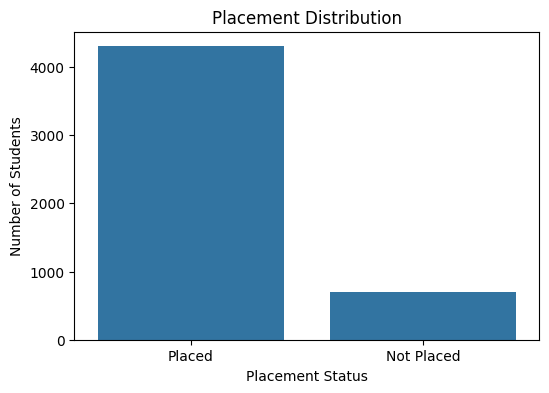

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

sns.countplot(data=df, x='placement_status')

plt.title("Placement Distribution")
plt.xlabel("Placement Status")
plt.ylabel("Number of Students")

plt.show()

**Insight**

Around 4300+ students are placed

Around 700 students are not placed

The dataset indicates a strong placement ecosystem with approximately 86% of students successfully placed.
However, the remaining 14% of students represent a critical segment for further analysis to identify employability gaps and improvement opportunities.


## **Chart 2 — Salary Distribution**

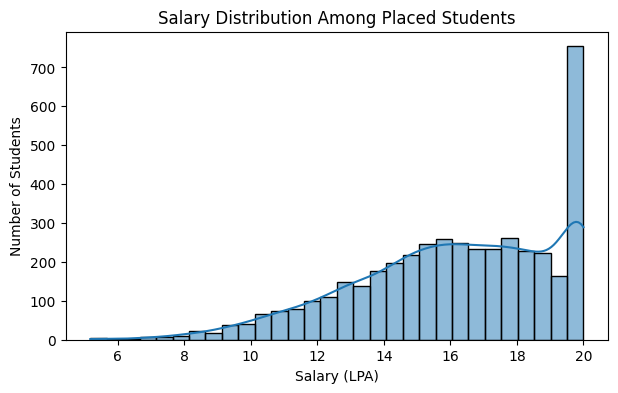

In [14]:
placed_df = df[df['placement_status'] == 'Placed']

plt.figure(figsize=(7,4))

sns.histplot(placed_df['salary_lpa'], bins=30, kde=True)

plt.title("Salary Distribution Among Placed Students")
plt.xlabel("Salary (LPA)")
plt.ylabel("Number of Students")

plt.show()


**Insight**

Salary distribution among placed students shows strong concentration between 14–18 LPA, indicating a stable compensation range for most graduates.                                          The distribution is slightly right-skewed, with a smaller group achieving premium salary offers near 20 LPA. Lower salary ranges represent a minority of students and may indicate employability variation based on skills, exposure, or academic performance.


## **Chart 3 — CGPA vs Placement**

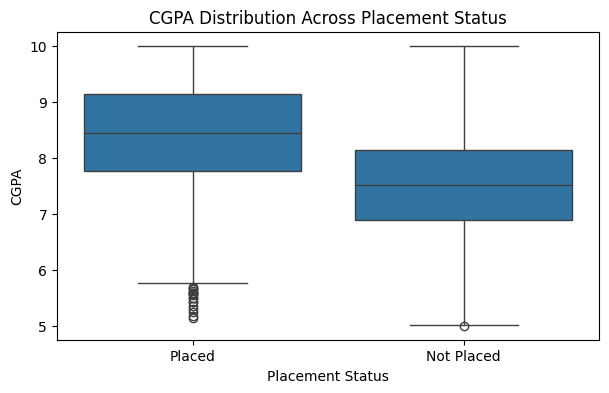

In [15]:
plt.figure(figsize=(7,4))

sns.boxplot(data=df, x='placement_status', y='cgpa')

plt.title("CGPA Distribution Across Placement Status")
plt.xlabel("Placement Status")
plt.ylabel("CGPA")

plt.show()


**Insights**

Placed students consistently demonstrate higher academic performance compared to unplaced students, with a noticeable median CGPA gap of approximately one grade point. However, the presence of high-CGPA unplaced students and low-CGPA placed students indicates that employability is influenced by multi-dimensional factors beyond academic achievement alone.


## **Chart 4 — Coding Skill vs Placement**

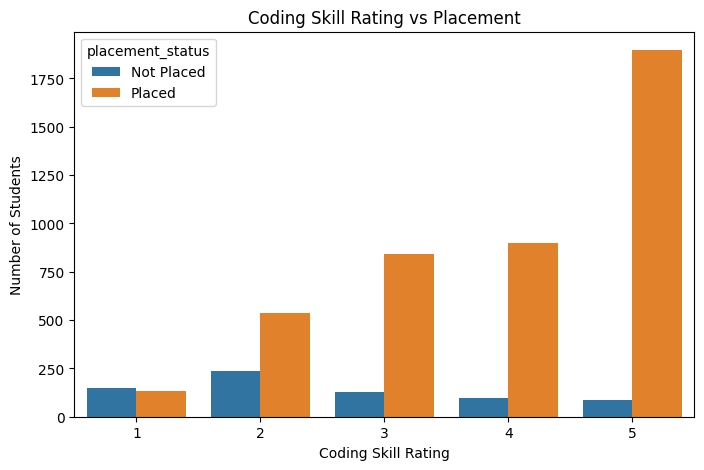

In [16]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x='coding_skill_rating', hue='placement_status')

plt.title("Coding Skill Rating vs Placement")
plt.xlabel("Coding Skill Rating")
plt.ylabel("Number of Students")

plt.show()



**Insights**

Coding skill rating demonstrates a strong positive relationship with placement outcomes. Students with higher coding skill ratings show significantly improved placement success, with skill rating 4 and above representing a strong employability threshold. Lower coding skill ratings correlate with increased placement vulnerability, highlighting technical skill development as a critical employability factor.


## **Chart 5 — Internships vs Placement**

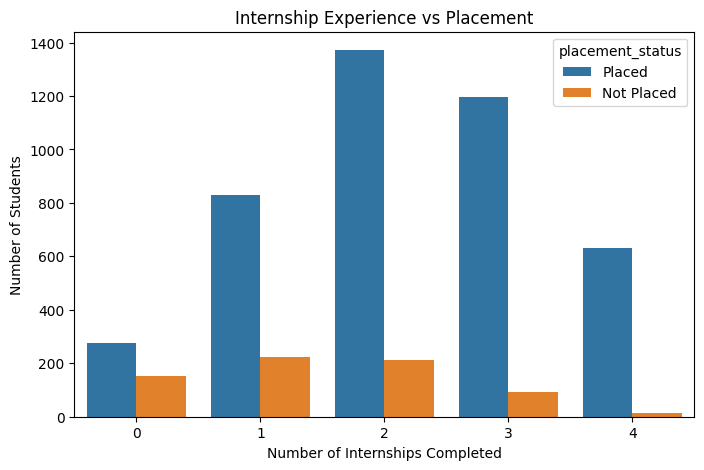

In [17]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x='internships_completed', hue='placement_status')

plt.title("Internship Experience vs Placement")
plt.xlabel("Number of Internships Completed")
plt.ylabel("Number of Students")

plt.show()

**Insights**

Internship experience demonstrates a strong positive relationship with placement success. Students completing two or more internships show significantly higher placement probability, while students without internship exposure display increased placement vulnerability. Practical industry exposure appears to be a critical employability differentiator.


## **Chart 6 — Sleep Hours vs Salary**

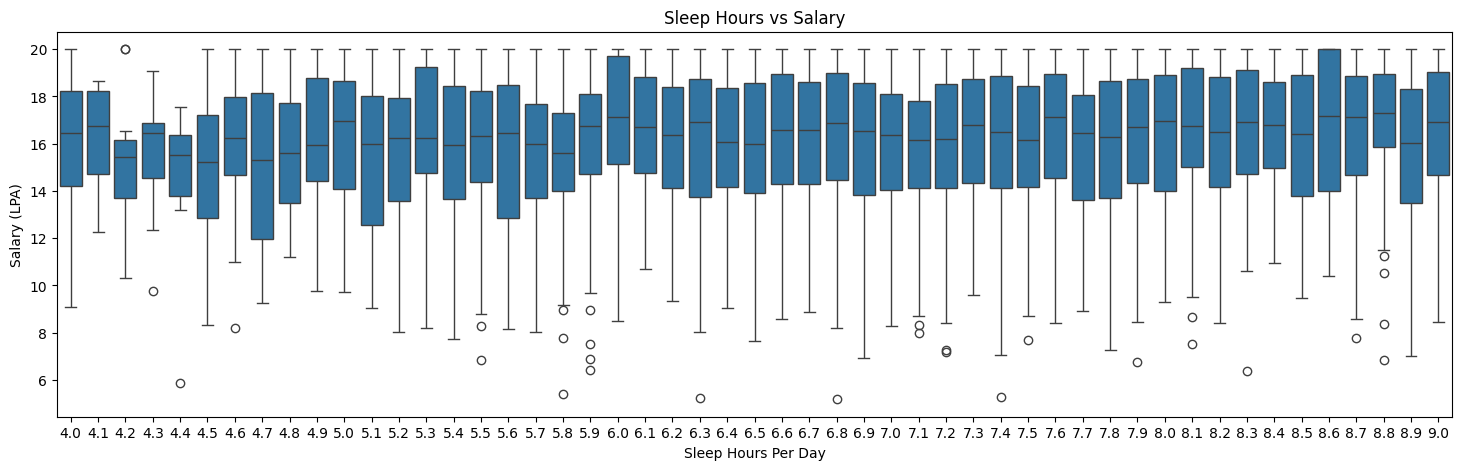

In [20]:
placed_df = df[df['placement_status'] == 'Placed']

plt.figure(figsize=(18,5))

sns.boxplot(data=placed_df, x='sleep_hours', y='salary_lpa')

plt.title("Sleep Hours vs Salary")
plt.xlabel("Sleep Hours Per Day")
plt.ylabel("Salary (LPA)")

plt.show()



**Insights**

Sleep duration shows relatively stable salary distribution across most ranges, indicating that lifestyle balance alone does not strongly influence compensation outcomes. However, moderate sleep patterns (6–8 hours) display slightly more consistent salary outcomes, while extreme sleep behaviors show greater variability.



## **Chart 7 — Exposure Score vs Placement**

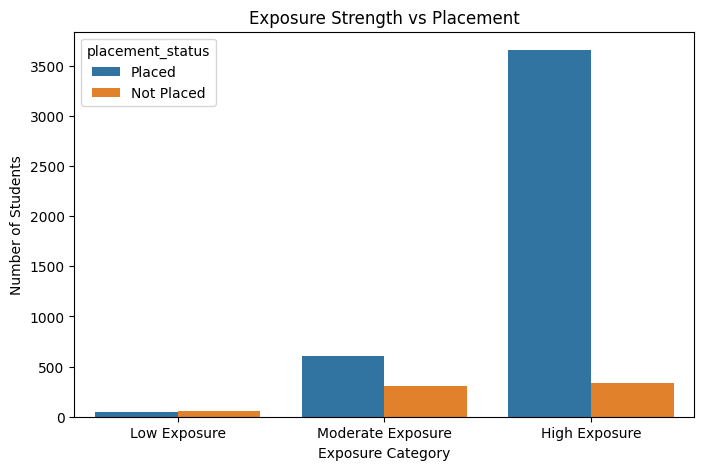

In [21]:
df['exposure_score'] = (
    df['internships_completed']
    + df['projects_completed']
    + df['certifications_count']
)

df['exposure_category'] = pd.cut(
    df['exposure_score'],
    bins=[-1,3,7,20],
    labels=['Low Exposure', 'Moderate Exposure', 'High Exposure']
)

plt.figure(figsize=(8,5))

sns.countplot(data=df, x='exposure_category', hue='placement_status')

plt.title("Exposure Strength vs Placement")
plt.xlabel("Exposure Category")
plt.ylabel("Number of Students")

plt.show()


**Insights**

Exposure strength demonstrates the strongest correlation with placement success among all evaluated factors. Students with high combined exposure through internships, projects, and certifications show overwhelmingly higher placement success rates. This suggests that practical experience accumulation is the most influential employability driver within the dataset.



## **Overall Project Conclusion**

The analysis reveals that employability outcomes among engineering students are influenced by multiple interacting factors. While academic performance and technical skill ratings significantly improve placement probability, practical exposure through internships, projects, and certifications emerges as the strongest placement predictor.

Students demonstrating balanced academic performance, strong coding proficiency, and high exposure levels consistently achieve superior placement and salary outcomes. Lifestyle and socioeconomic factors show moderate influence but are less decisive compared to skill and exposure metrics.

These findings emphasize the importance of experiential learning and industry exposure programs in improving graduate employability.
